In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras

In [14]:
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [15]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
len(train_labels)
train_labels
test_images.shape
len(test_labels)

10000

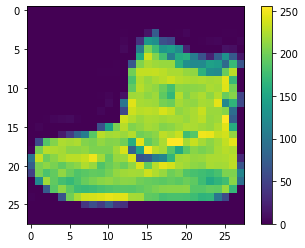

In [19]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# Scaling Images between 0-1
train_images = train_images/ 255.0
test_images = test_images/ 255.0

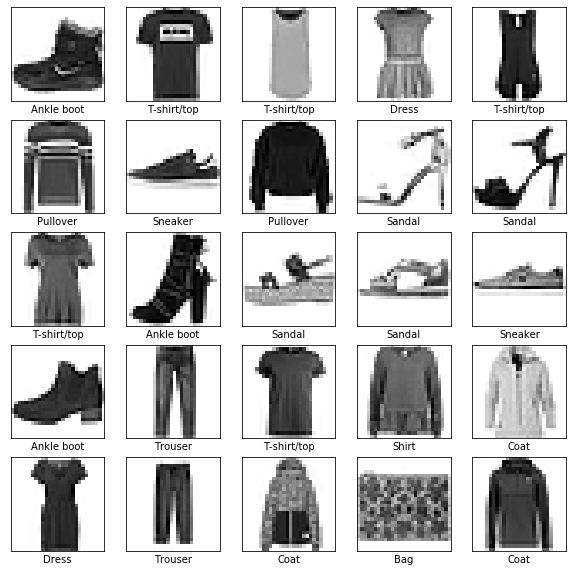

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [41]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.4962 - accuracy: 0.8248
Epoch 2/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3744 - accuracy: 0.8645
Epoch 3/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3364 - accuracy: 0.8770
Epoch 4/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3133 - accuracy: 0.8850
Epoch 5/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2959 - accuracy: 0.8903
Epoch 6/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2806 - accuracy: 0.8961
Epoch 7/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2680 - accuracy: 0.9004
Epoch 8/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2585 - accuracy: 0.9032
Epoch 9/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2476 - accuracy: 0.9075
Epoch 10/10
60

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest Accuracy:", test_acc)

10000/10000 - 0s - loss: 0.3314 - accuracy: 0.8849

Test Accuracy: 0.8849


In [25]:
predictions = model.predict(test_images)
prediction[0]
np.argmax(prediction[0])

NameError: name 'model1' is not defined

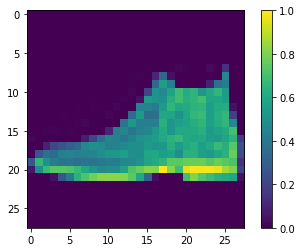

In [45]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [22]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

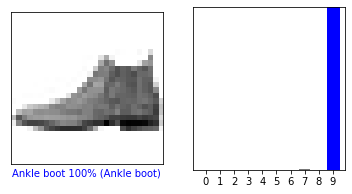

In [48]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

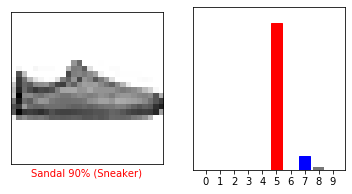

In [49]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

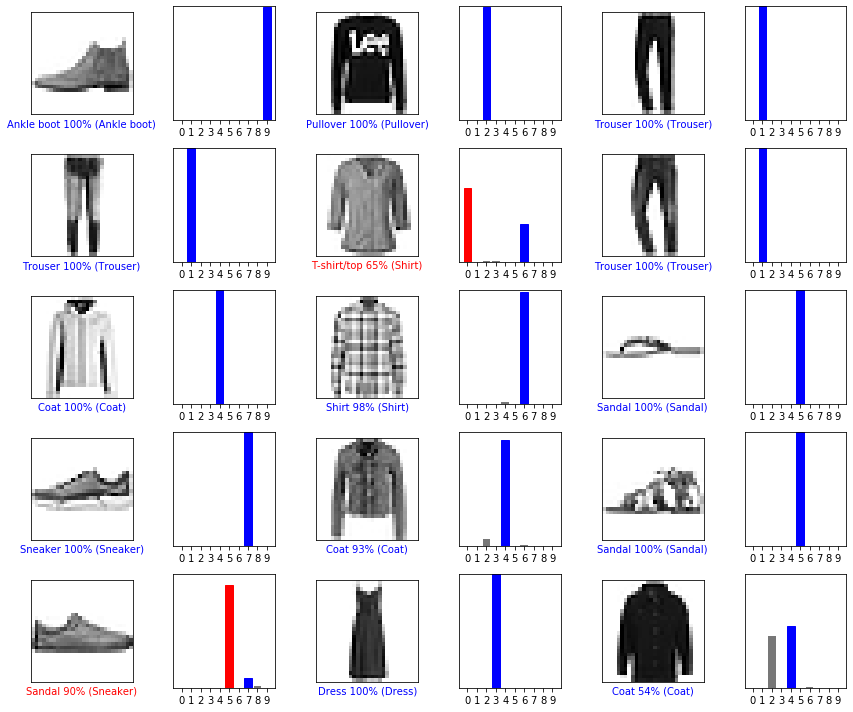

In [50]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [5]:
#conv2d
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train= np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [6]:
model2 = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [9]:
model2.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
model2.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 516us/sample - loss: 0.4368 - accuracy: 0.8415
Epoch 2/10
60000/60000 [==============================] - 31s 517us/sample - loss: 0.3794 - accuracy: 0.8616
Epoch 3/10
60000/60000 [==============================] - 31s 521us/sample - loss: 0.3451 - accuracy: 0.8748
Epoch 4/10
60000/60000 [==============================] - 31s 522us/sample - loss: 0.3244 - accuracy: 0.8805
Epoch 5/10
60000/60000 [==============================] - 31s 522us/sample - loss: 0.3082 - accuracy: 0.8876
Epoch 6/10
60000/60000 [==============================] - 32s 525us/sample - loss: 0.2956 - accuracy: 0.8904
Epoch 7/10
60000/60000 [==============================] - 34s 560us/sample - loss: 0.2848 - accuracy: 0.8947
Epoch 8/10
60000/60000 [==============================] - 33s 544us/sample - loss: 0.2765 - accuracy: 0.8985
Epoch 9/10
60000/60000 [==============================] - 32s 540us/sample - loss: 0.2651 - accuracy: 0.9

In [12]:
# Evaluate the model on test set
score = model2.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9118


In [28]:
predictions = model2.predict(x_test)
predictions[0]
np.argmax(predictions[0])

9

TypeError: Invalid shape (28, 28, 1) for image data

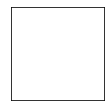

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()